In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## TRUE COST OF FASHION IMPACT DATASET
https://www.kaggle.com/datasets/khushikyad001/the-true-cost-of-fast-fashion-impact

Set de datos realistas simulados obtenidos de datos abiertos.

In [3]:

tc_df= pd.read_csv(r"C:\Users\isabe\Documents\Thebridge\Ejercicios Isa\U2 Data analysis\EDA\temas\moda\true_cost_fast_fashion.csv")

tc_df

,Brand,Country,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,...,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,Social_Sentiment_Label,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
0,Shein,Indonesia,2017,574.51,19.31,16,11421.58,282.11,616.63,143.79,...,4655,3435,0.05,Neutral,608.51,0.49,29.12,61.19,13.95,1.46
1,Forever 21,Vietnam,2024,394.50,9.30,20,5571.01,289.22,795.11,167.78,...,9655,6285,-0.12,Positive,689.49,0.21,49.52,3.44,90.93,1.29
2,Uniqlo,India,2024,310.23,25.46,11,10969.00,116.39,364.33,97.81,...,8016,387,0.08,Neutral,439.78,0.63,96.53,60.70,27.60,1.48
3,Forever 21,USA,2017,218.65,13.17,13,13093.00,255.88,632.16,134.54,...,8254,1620,-0.06,Neutral,746.70,0.21,71.32,76.08,56.13,3.85
4,Zara,Indonesia,2016,1005.84,15.40,20,9548.40,142.07,830.10,144.33,...,1778,3292,-0.59,Neutral,571.42,0.95,59.89,69.48,88.05,3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Zara,India,2020,549.36,17.77,21,11214.01,87.08,768.13,165.22,...,3079,3053,0.06,Negative,582.87,0.99,26.52,21.80,33.48,2.63
2996,Shein,USA,2021,670.54,18.05,24,10548.69,275.01,950.90,143.33,...,5297,2617,0.40,Positive,274.78,0.25,89.54,24.81,94.90,0.08
2997,Zara,China,2023,370.31,22.25,22,3385.09,211.81,906.82,104.30,...,6427,4743,-0.71,Negative,607.47,0.75,42.57,75.29,55.28,0.20
2998,Shein,Brazil,2015,649.20,23.00,14,10822.80,232.33,818.08,140.45,...,4487,5178,-0.34,Negative,509.98,0.32,5.59,16.66,20.73,2.89


## Análisis preliminar de los datos disponibles

In [4]:
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         3000 non-null   object 
 1   Country                       3000 non-null   object 
 2   Year                          3000 non-null   int64  
 3   Monthly_Production_Tonnes     3000 non-null   float64
 4   Avg_Item_Price_USD            3000 non-null   float64
 5   Release_Cycles_Per_Year       3000 non-null   int64  
 6   Carbon_Emissions_tCO2e        3000 non-null   float64
 7   Water_Usage_Million_Litres    3000 non-null   float64
 8   Landfill_Waste_Tonnes         3000 non-null   float64
 9   Avg_Worker_Wage_USD           3000 non-null   float64
 10  Working_Hours_Per_Week        3000 non-null   int64  
 11  Child_Labor_Incidents         3000 non-null   int64  
 12  Return_Rate_Percent           3000 non-null   float64
 13  Avg

Datos iniciales: 3000 filas y 25 columnas
No falta ningún dato.
Tenemos 22 columnas numéricas y 3 de strings.

In [5]:
tc_df['Brand'].value_counts()

Brand
H&M           650
Forever 21    617
Zara          606
Uniqlo        581
Shein         546
Name: count, dtype: int64

El set de datos inicial está compuesto por 5 marcas.

Vamos a analizar tres marcas:
* ***Zara***: marca de fast fashion que sigue las tendencias. Fundada en 1975 en España. Forma parte del grupo Inditex.

* ***Uniqlo***: marca de fast fashion de productos básicos, sencillos y unisex. Fundada en 1984 en Japón.

* ***Shein***: marca de ultra fast fashion con todo tipo de estilos y tallas. Fundada en 2008 en China.



In [6]:
marcas = ['Zara', 'Uniqlo', 'Shein']

marcas_mask = tc_df['Brand'].isin(marcas)

tc = tc_df[marcas_mask]

tc

,Brand,Country,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,...,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,Social_Sentiment_Label,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
0,Shein,Indonesia,2017,574.51,19.31,16,11421.58,282.11,616.63,143.79,...,4655,3435,0.05,Neutral,608.51,0.49,29.12,61.19,13.95,1.46
2,Uniqlo,India,2024,310.23,25.46,11,10969.00,116.39,364.33,97.81,...,8016,387,0.08,Neutral,439.78,0.63,96.53,60.70,27.60,1.48
4,Zara,Indonesia,2016,1005.84,15.40,20,9548.40,142.07,830.10,144.33,...,1778,3292,-0.59,Neutral,571.42,0.95,59.89,69.48,88.05,3.12
6,Uniqlo,Indonesia,2018,400.59,19.27,25,12453.62,136.72,648.33,172.87,...,5955,7442,0.27,Positive,500.79,0.71,53.09,44.78,55.29,2.96
10,Zara,Brazil,2022,498.28,22.07,13,13628.15,232.28,1346.88,154.69,...,3544,2615,-0.26,Negative,596.49,0.11,92.83,42.82,96.67,4.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Zara,India,2020,549.36,17.77,21,11214.01,87.08,768.13,165.22,...,3079,3053,0.06,Negative,582.87,0.99,26.52,21.80,33.48,2.63
2996,Shein,USA,2021,670.54,18.05,24,10548.69,275.01,950.90,143.33,...,5297,2617,0.40,Positive,274.78,0.25,89.54,24.81,94.90,0.08
2997,Zara,China,2023,370.31,22.25,22,3385.09,211.81,906.82,104.30,...,6427,4743,-0.71,Negative,607.47,0.75,42.57,75.29,55.28,0.20
2998,Shein,Brazil,2015,649.20,23.00,14,10822.80,232.33,818.08,140.45,...,4487,5178,-0.34,Negative,509.98,0.32,5.59,16.66,20.73,2.89


In [7]:
tc['Brand'].value_counts()

Brand
Zara      606
Uniqlo    581
Shein     546
Name: count, dtype: int64

In [8]:
tc['Country'].value_counts()

Country
Turkey        187
India         185
USA           180
UK            174
Bangladesh    174
Brazil        173
Germany       168
China         167
Indonesia     165
Vietnam       160
Name: count, dtype: int64

Nuestro nuevo se de datos tiene 1733 columnas.

Tenemos un muestreo con un número de datos similar en las 3 marcas y para los 10 paises analizados.


**Estas son las variables recogidas en el set de datos**


| Columna/Variable | Descripción |
| ---------------- | ----------- |
| Brand            | Marca (Zara, Uniqlo y Shein) |
| Country          | País de las operaciones |
| Year             | Año (2015-2024)|
| Monthly Production Tonnes              | La producción mensual en toneladas |
| Avg. Item Price USD           | El precio medio de una prenda en dólares |
| Release Cycles Per Year          | Número de colecciones presentadas por año |
| Carbon Emissions tCO2e            | Emisiones de dióxido de carbono equivalente en toneladas |
| Water Usage Million Litres         | Uso de agua en millones de litros |
| Landfill Waste Tonnes            | Residuos vertidos en toneladas |
| Avg. Worker Wage USD      | Sueldo medio por trabajador en dólares|
| Working Hours per Week       | Horas trabajadas a la semana |
| Child Labor Incidents            | Incidencias por trabajo infantil |
| Return Rate Percent      |Tasa de devoluciones en porcentaje|
| Avg. Spent per Customer USD        |Gasto medio por cliente en dólares |
| Shopping Frequency per Year         | Frecuencia de las compras anuales de un cliente |
| Instagram Mentions Thousands           | Menciones en Instagram por millares |
| Tik Tok Mentions Thousands           | Menciones en Tik Tok por millares |
| Sentiment Score           | Marcador de percepción del cliente sobre esa marca |
| Social Sentiment Label          | Clasificación de percepción de la marca en redes sociales |
| GDP Contribution Million USD            | Contribución al PIB del país en millones de dólares |
| Env. Cost Index         | Índice del coste ambiental |
| Sustainability Score            | Puntuación de sostenibilidad |
| Transparency Index      | Índice de transparencia|
| Compliance Score       | Puntuación de cumplimiento de leyes|
| Ethical Rating            | Índice ético |



In [9]:
tc.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1733.0,2019.525101,2.882030,2015.00,2017.00,2020.00,2022.00,2024.00
Monthly_Production_Tonnes,1733.0,496.115672,148.571042,3.82,398.11,492.59,595.30,1005.84
Avg_Item_Price_USD,1733.0,20.018165,4.883271,1.20,16.60,19.90,23.36,35.81
Release_Cycles_Per_Year,1733.0,17.779573,6.925944,6.00,12.00,18.00,24.00,29.00
Carbon_Emissions_tCO2e,1733.0,9998.561875,2982.202998,662.42,7959.36,9876.21,11986.26,19585.47
Water_Usage_Million_Litres,1733.0,200.874841,59.884387,-38.06,160.32,200.40,240.72,368.64
Landfill_Waste_Tonnes,1733.0,792.127911,197.314080,58.24,655.10,796.75,927.07,1480.38
Avg_Worker_Wage_USD,1733.0,150.078523,50.974939,-52.70,115.94,149.71,185.21,312.58
Working_Hours_Per_Week,1733.0,54.314484,8.609088,40.00,47.00,54.00,62.00,69.00
Child_Labor_Incidents,1733.0,0.991344,1.010588,0.00,0.00,1.00,2.00,5.00


A simple vista vemos:

* Year:                             *2015-2024*

* Monthly Production Tonnes:        *Tiene outliers inferiores*

* Av Item Price ($):                *1.20 y 35.81*

* Release Cycles per Year:          *6 y 29 colecciones anuales*
* Carbon Emission T CO2 eq:         *Tiene outliers inferiores*
* Water Usage Million Litres:       *Tiene datos erróneos porque hay números negativos*
* Landfill Waste Tonnes:            *Tiene outliers*
* Average Worker Wage ($):            *Hay datos negativos, hay que analizar los casos*
* Working Hours per Week:           *40 y 69 horas*
* Child Labour Incidents:           *0 y 5 casos*
* Return Rate %:                    *10-40 devoluciones*
* Average Spent per Customer ($):     *Hay outliers*
* Shopping Frequency per Year:      *3-19 veces*
* Instagram Mentions Thousands:     *Tiene outliers inferiores*
* Tik Tok Mention Thousands:        *Tiene outliers inferiores*
* Sentiment score:                  *-1 y 1*
* GDP Contribution Million ($):       *Hay outliers*
* Enviroment Cost Index:            *0.10 y 1.0*
* Sustainability Score:             *Hay outliers inferiores*
* Transparency Index:               *Hay outliers inferiores*
* Compliance Score:                 *Hay outliers inferiores*
* Ethical Rating:                   *0 y 5*


* **Clasificación de las variables por tipos**

In [10]:
def card_tipo(df,umbral_categoria = 2, umbral_continua = 30):
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_temp = df_temp.T
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[(df_temp["Card"] >= umbral_categoria) & (df_temp["Tipo"] != "object"), "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"

    return df_temp

In [11]:
card_tipo(tc)

,Card,%_Card,Tipo,tipo_sugerido
Brand,3,0.17311,object,Categorica
Country,10,0.577034,object,Categorica
Year,10,0.577034,int64,Numerica discreta
Monthly_Production_Tonnes,1708,98.557415,float64,Numerica continua
Avg_Item_Price_USD,1110,64.050779,float64,Numerica continua
Release_Cycles_Per_Year,24,1.384882,int64,Numerica discreta
Carbon_Emissions_tCO2e,1732,99.942297,float64,Numerica continua
Water_Usage_Million_Litres,1659,95.729948,float64,Numerica continua
Landfill_Waste_Tonnes,1711,98.730525,float64,Numerica continua
Avg_Worker_Wage_USD,1669,96.306982,float64,Numerica continua


División del análisis en áreas:

* Contaminación

* Clientes

* Datos laborales, éticos y de sostenibilidad


### Análisis Univariable:

#### Paises presentes por año:

In [12]:
tc.head(5)

,Brand,Country,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,...,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,Social_Sentiment_Label,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
0,Shein,Indonesia,2017,574.51,19.31,16,11421.58,282.11,616.63,143.79,...,4655,3435,0.05,Neutral,608.51,0.49,29.12,61.19,13.95,1.46
2,Uniqlo,India,2024,310.23,25.46,11,10969.00,116.39,364.33,97.81,...,8016,387,0.08,Neutral,439.78,0.63,96.53,60.70,27.60,1.48
4,Zara,Indonesia,2016,1005.84,15.40,20,9548.40,142.07,830.10,144.33,...,1778,3292,-0.59,Neutral,571.42,0.95,59.89,69.48,88.05,3.12
6,Uniqlo,Indonesia,2018,400.59,19.27,25,12453.62,136.72,648.33,172.87,...,5955,7442,0.27,Positive,500.79,0.71,53.09,44.78,55.29,2.96
10,Zara,Brazil,2022,498.28,22.07,13,13628.15,232.28,1346.88,154.69,...,3544,2615,-0.26,Negative,596.49,0.11,92.83,42.82,96.67,4.82


In [ ]:
#Creamos una tabla de los datos de los países sin tener en cuenta qué marca es.

country_years = tc.groupby('Year')['Country']

country_years.describe()

,count,unique,top,freq
Year,,,,
2015,179,10,Germany,31
2016,164,10,USA,21
2017,175,10,UK,23
2018,176,10,Turkey,24
2019,163,10,Brazil,26
2020,155,10,Turkey,20
2021,192,10,Bangladesh,27
2022,180,10,India,24
2023,180,10,Turkey,28


<Figure size 1200x600 with 0 Axes>

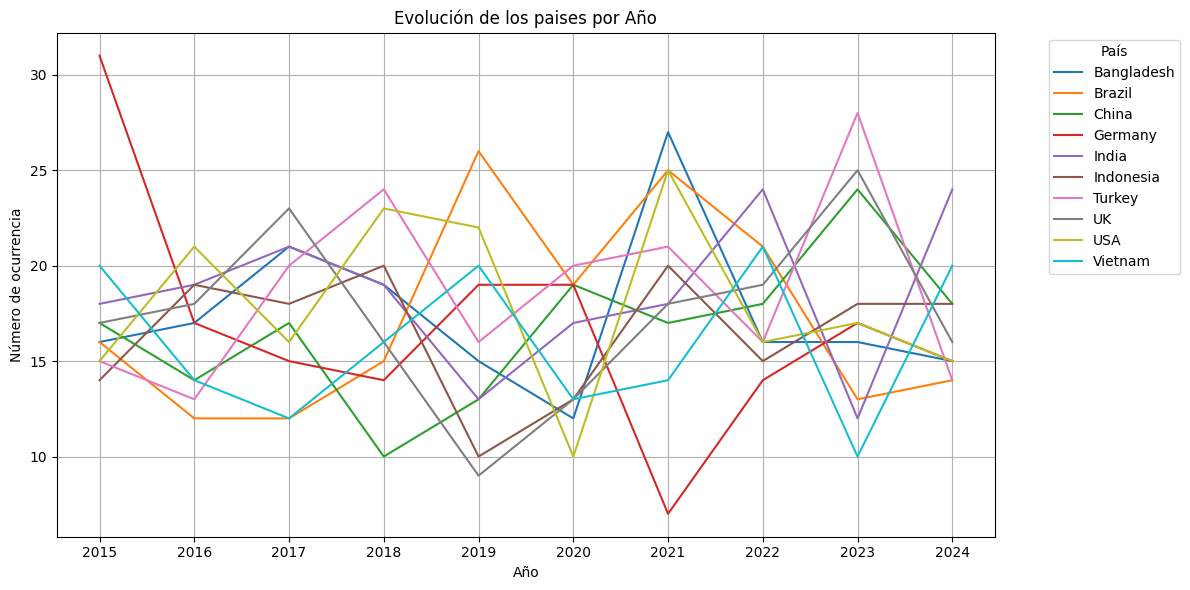

In [15]:
country_year_counts = tc.groupby('Year')['Country'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
country_year_counts.plot(kind='line', figsize=(12, 6))

plt.title('Evolución de los paises por Año')
plt.xlabel('Año')
plt.ylabel('Número de ocurrencia')
plt.xticks(country_year_counts.index)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

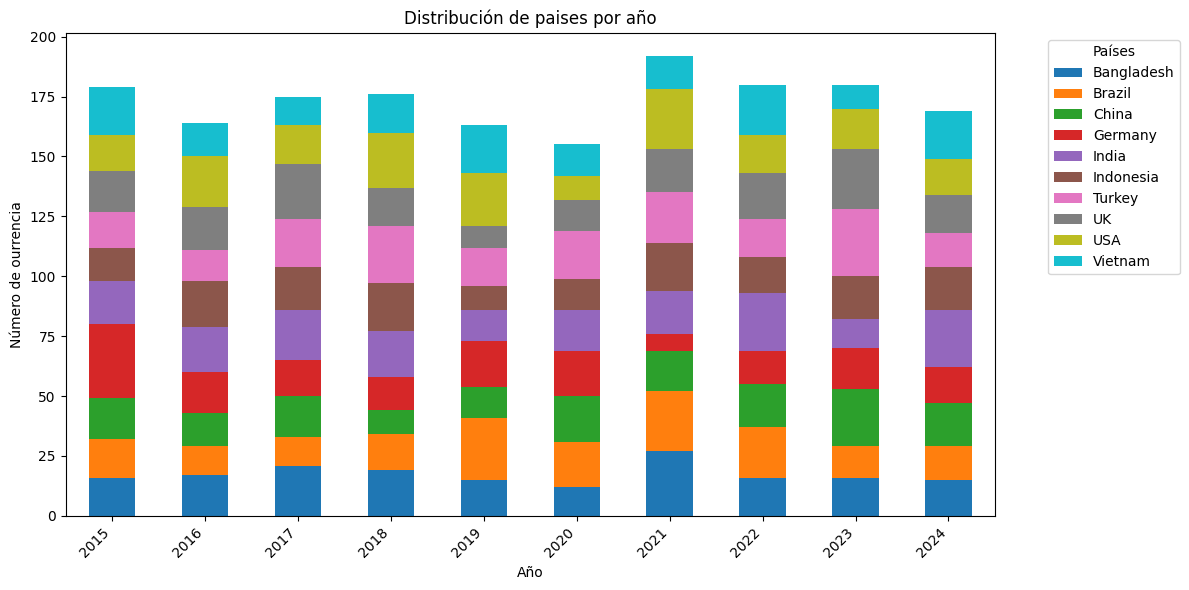

In [16]:
plt.figure(figsize=(12, 6))
country_year_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Distribución de paises por año')
plt.xlabel('Año')
plt.ylabel('Número de ourrencia')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###EMISIONES DE CARBONO

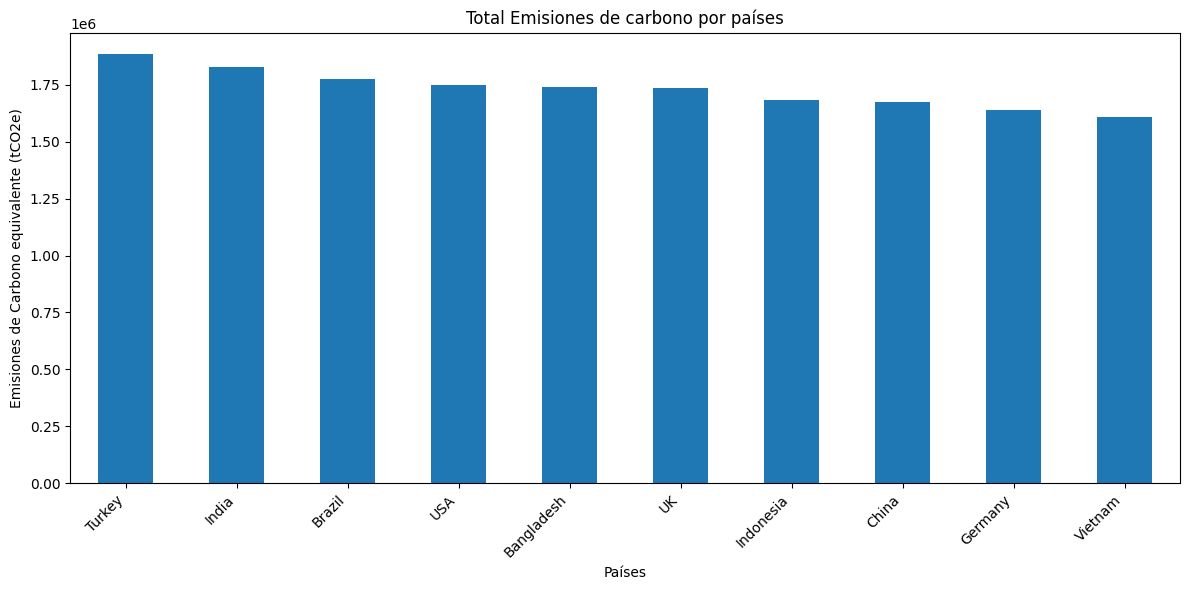

In [17]:
country_carbon_emissions = tc.groupby('Country')['Carbon_Emissions_tCO2e'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
country_carbon_emissions.plot(kind='bar')

plt.title('Total Emisiones de carbono por países')
plt.xlabel('Países')
plt.ylabel('Emisiones de Carbono equivalente (tCO2e)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
tc.head()

,Brand,Country,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,...,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,Social_Sentiment_Label,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
0,Shein,Indonesia,2017,574.51,19.31,16,11421.58,282.11,616.63,143.79,...,4655,3435,0.05,Neutral,608.51,0.49,29.12,61.19,13.95,1.46
2,Uniqlo,India,2024,310.23,25.46,11,10969.00,116.39,364.33,97.81,...,8016,387,0.08,Neutral,439.78,0.63,96.53,60.70,27.60,1.48
4,Zara,Indonesia,2016,1005.84,15.40,20,9548.40,142.07,830.10,144.33,...,1778,3292,-0.59,Neutral,571.42,0.95,59.89,69.48,88.05,3.12
6,Uniqlo,Indonesia,2018,400.59,19.27,25,12453.62,136.72,648.33,172.87,...,5955,7442,0.27,Positive,500.79,0.71,53.09,44.78,55.29,2.96
10,Zara,Brazil,2022,498.28,22.07,13,13628.15,232.28,1346.88,154.69,...,3544,2615,-0.26,Negative,596.49,0.11,92.83,42.82,96.67,4.82


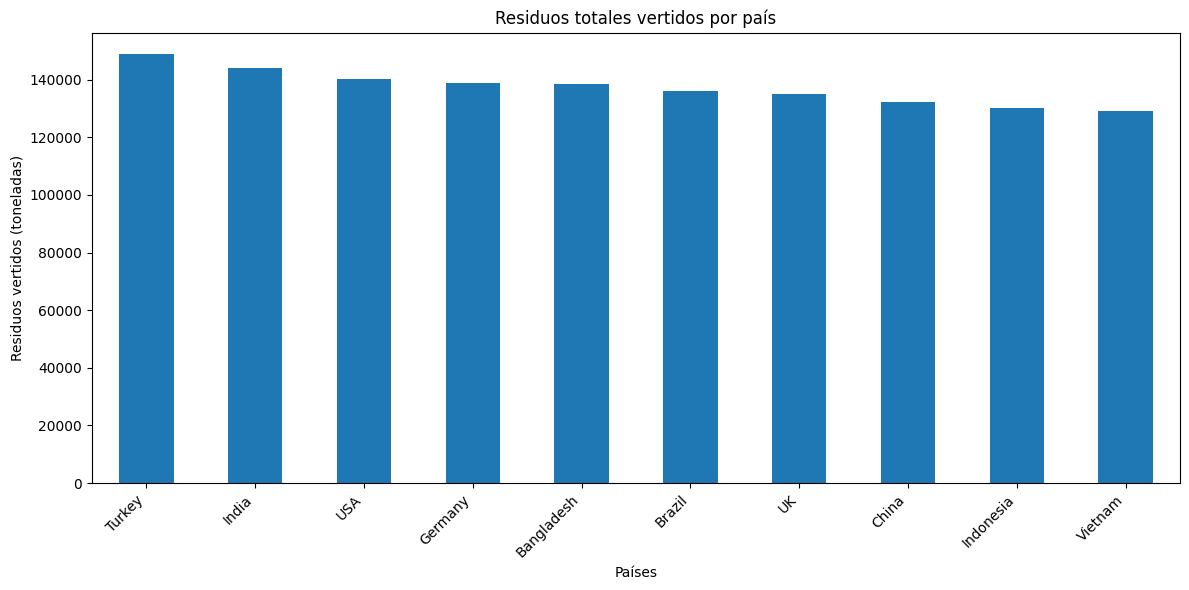

In [19]:
country_landfill = tc.groupby('Country')['Landfill_Waste_Tonnes'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
country_landfill.plot(kind='bar')

plt.title('Residuos totales vertidos por país')
plt.xlabel('Países')
plt.ylabel('Residuos vertidos (toneladas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

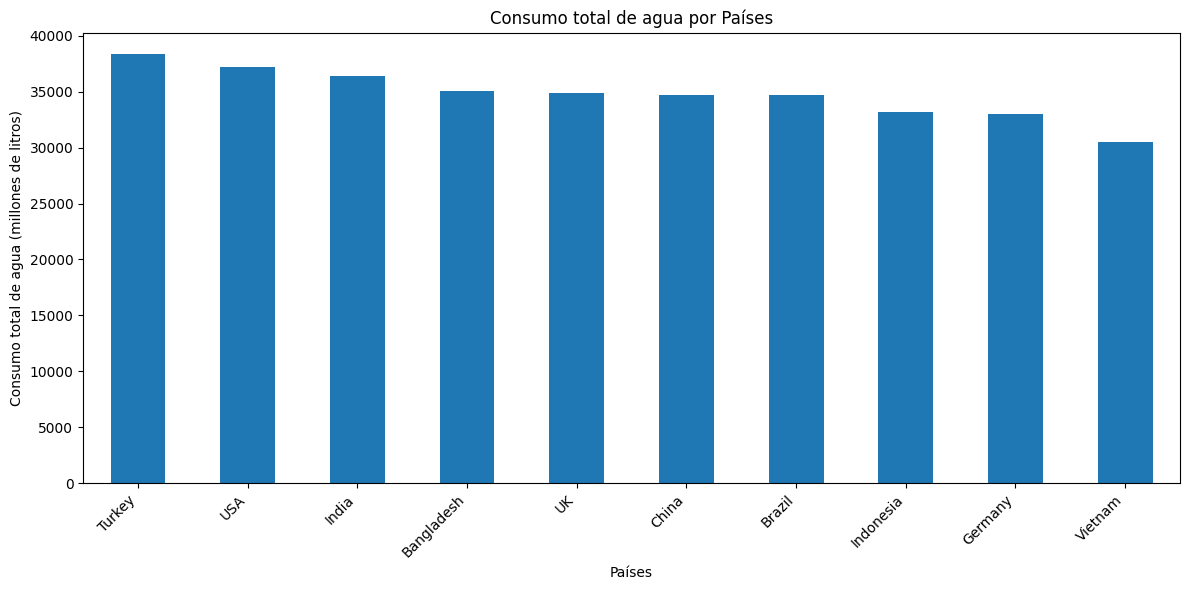

In [20]:
country_water = tc.groupby('Country')['Water_Usage_Million_Litres'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
country_water.plot(kind='bar')

plt.title('Consumo total de agua por Países')
plt.xlabel('Países')
plt.ylabel('Consumo total de agua (millones de litros)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

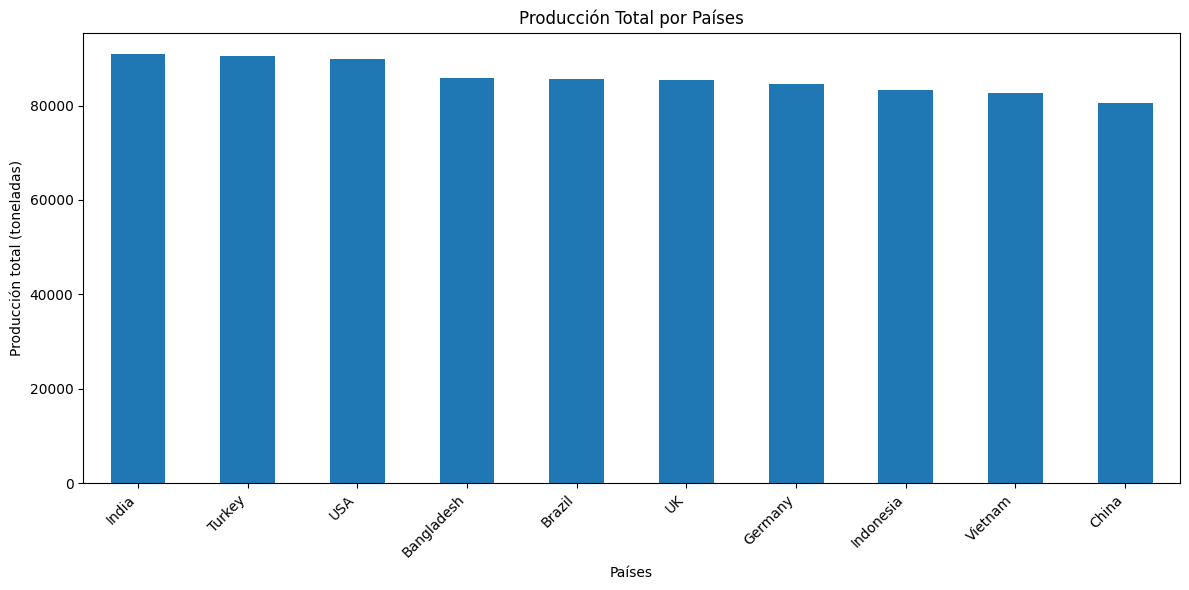

In [21]:
country_productions = tc.groupby('Country')['Monthly_Production_Tonnes'].sum().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(12, 6))
country_productions.plot(kind='bar')

plt.title('Producción Total por Países')
plt.xlabel('Países')
plt.ylabel('Producción total (toneladas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

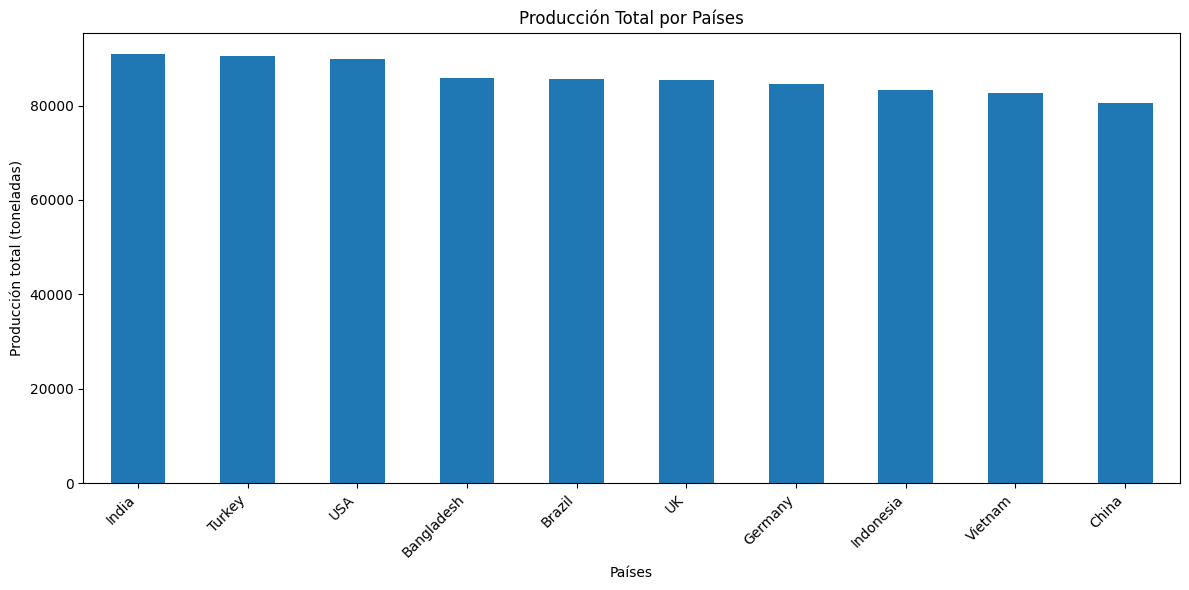

In [22]:
country_productions = tc.groupby('Country')['Monthly_Production_Tonnes'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
country_productions.plot(kind='bar')

plt.title('Producción Total por Países')
plt.xlabel('Países')
plt.ylabel('Producción total (toneladas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#vamos a unir los datos de contaminación de todos los países al no haber diferencias significativas entre unos y otros:


brand_tc_enviro = tc.groupby(['Brand','Year']).sum(numeric_only=True)

brand_tc_enviro = brand_tc_enviro.loc[:,['Monthly_Production_Tonnes','Carbon_Emissions_tCO2e','Water_Usage_Million_Litres','Landfill_Waste_Tonnes']]


display(brand_tc_enviro.head(3))


Monthly_Production_Tonnes  Carbon_Emissions_tCO2e  \
Brand Year                                                      
Shein 2015                   28276.37               527165.57   
      2016                   25368.67               470485.87   
      2017                   30544.82               677288.25   

            Water_Usage_Million_Litres  Landfill_Waste_Tonnes  
Brand Year                                                     
Shein 2015                    10590.44               43763.61  
      2016                     9351.09               36637.44  
      2017                    12318.73               52902.38

<Axes: >

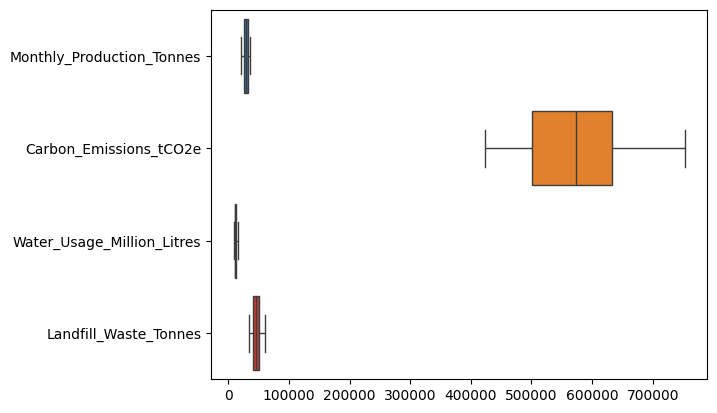

In [41]:
sns.boxplot(data=brand_tc_enviro,orient='h')

<Axes: >

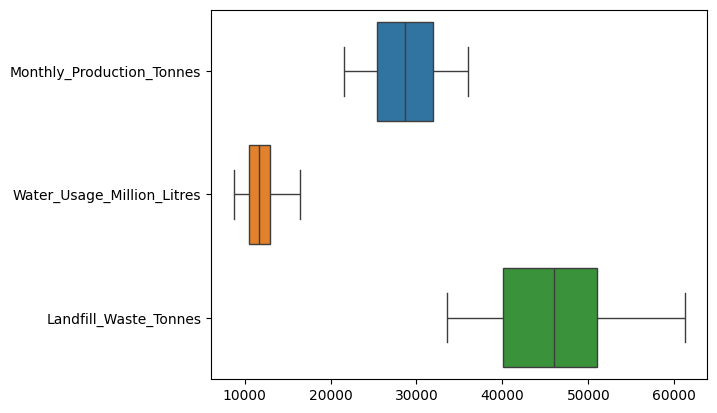

In [42]:
sns.boxplot(data=brand_tc_enviro.loc[:,['Monthly_Production_Tonnes','Water_Usage_Million_Litres','Landfill_Waste_Tonnes']],orient='h')

<Axes: >

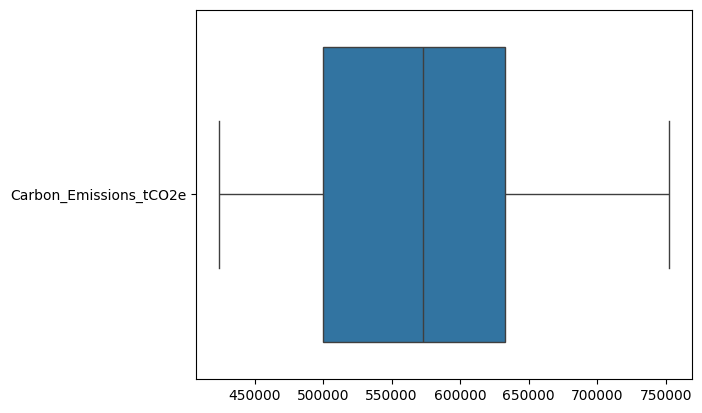

In [43]:
sns.boxplot(data=brand_tc_enviro.loc[:,['Carbon_Emissions_tCO2e']],orient='h')

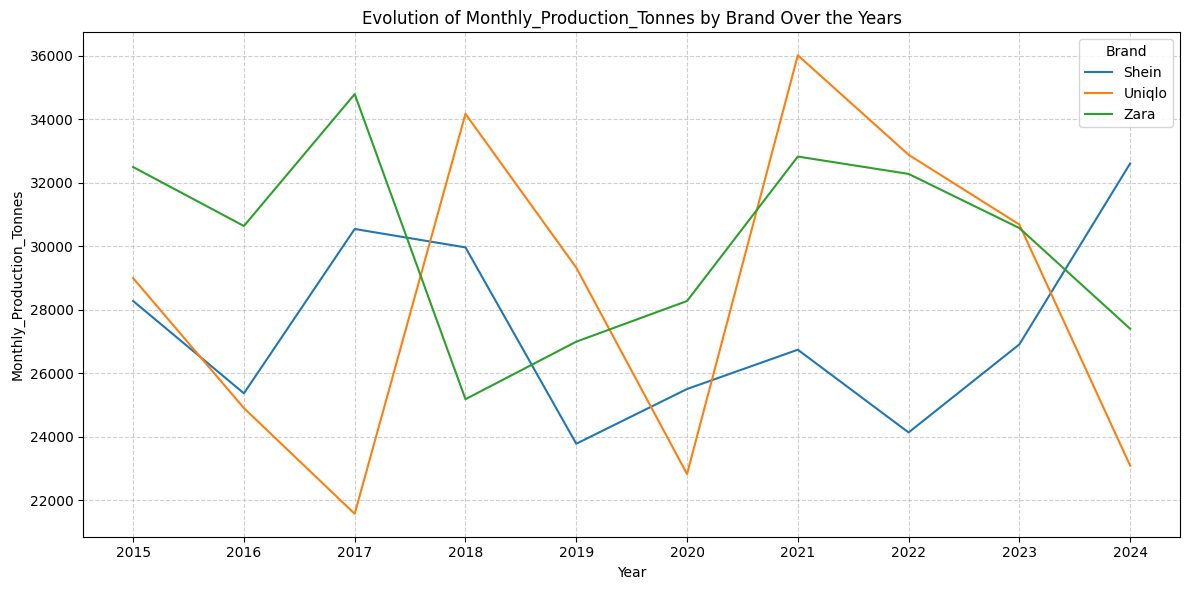

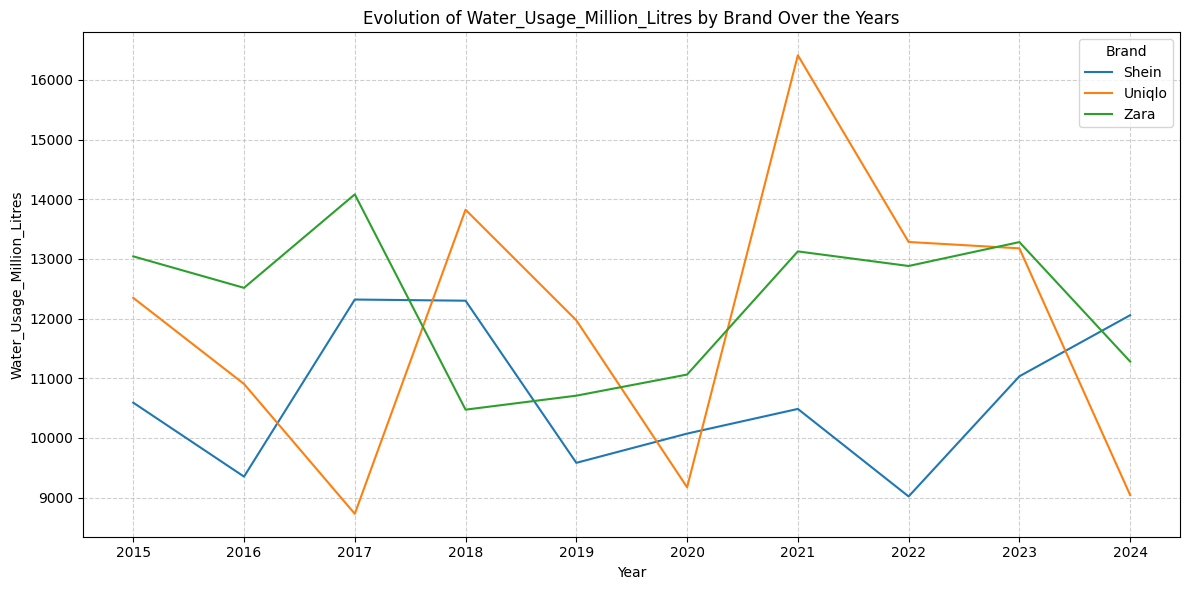

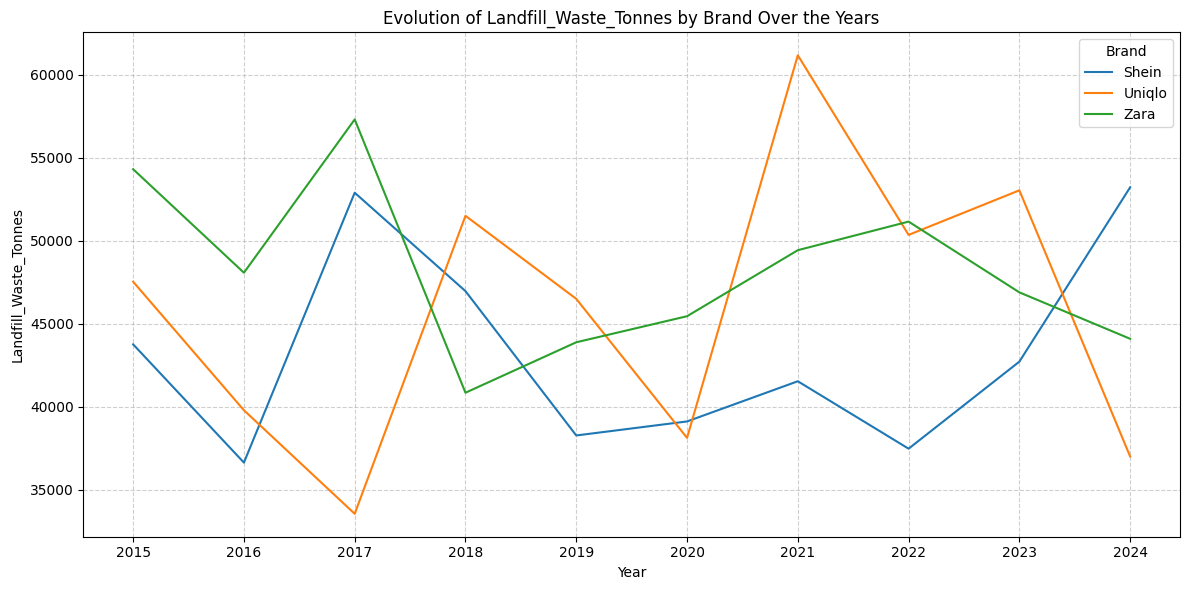

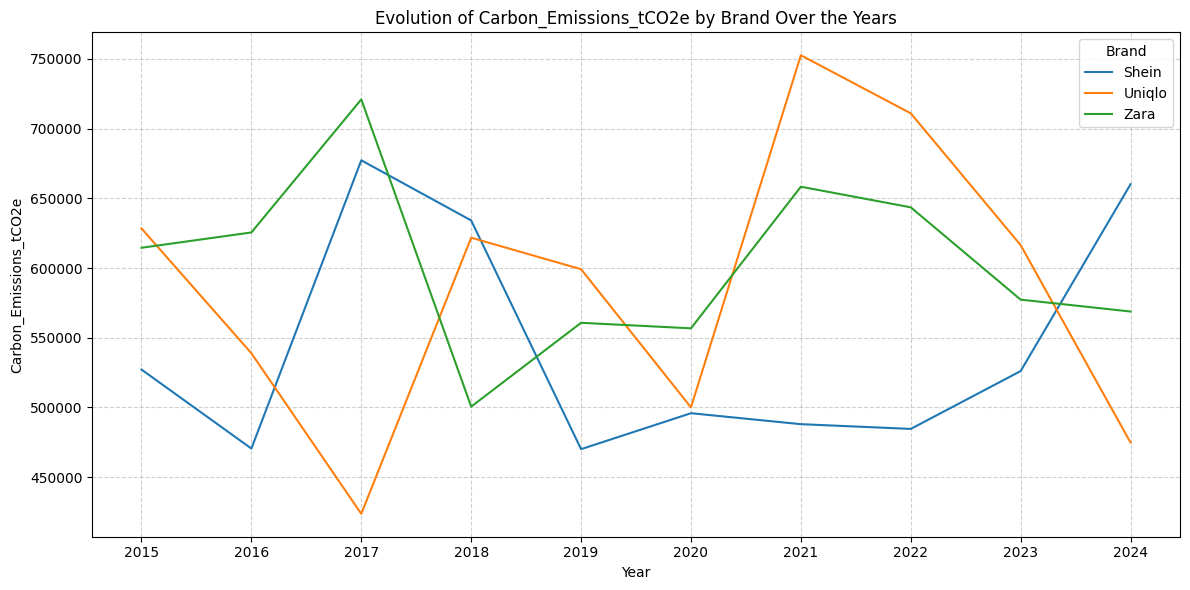

In [71]:
variables = [
    'Monthly_Production_Tonnes',
    'Water_Usage_Million_Litres',
    'Landfill_Waste_Tonnes',
    'Carbon_Emissions_tCO2e']

for variable in variables:
    if variable in brand_tc.columns:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=brand_tc.reset_index(), x='Year', y=variable, hue='Brand')
        plt.title(f'Evolution of {variable} by Brand Over the Years')
        plt.xlabel('Year')
        plt.ylabel(variable)
        plt.xticks(brand_tc.index.get_level_values('Year').unique())
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Metric '{variable}' not found in the dataframe.")

<Figure size 1200x600 with 0 Axes>

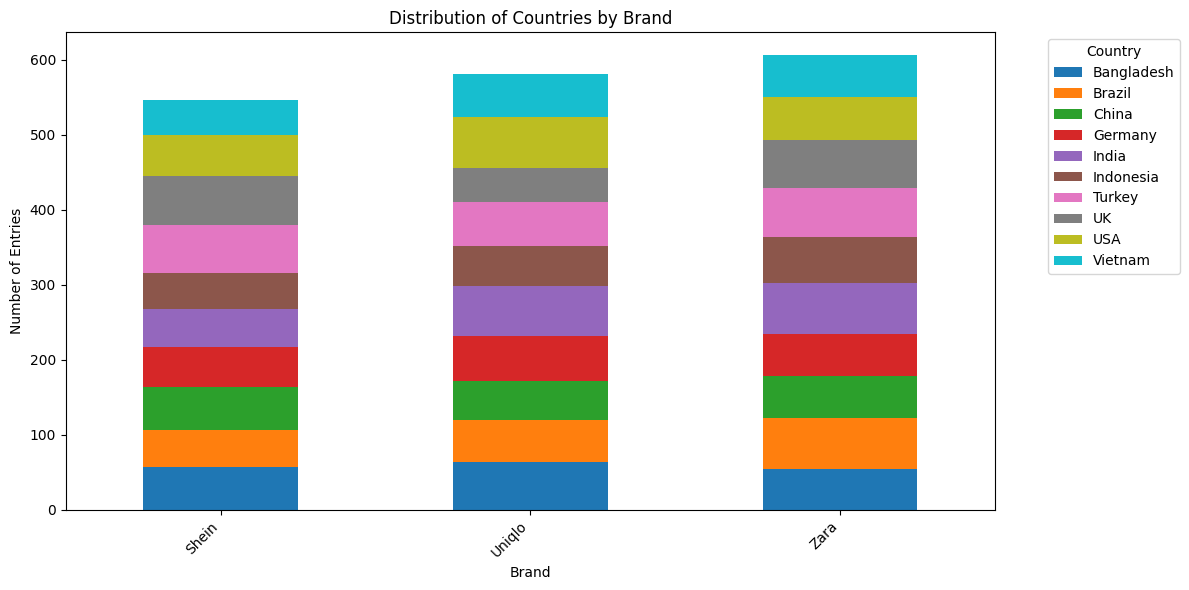

In [ ]:
brand_country_counts = tc.groupby('Brand')['Country'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
brand_country_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Distribution of Countries by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

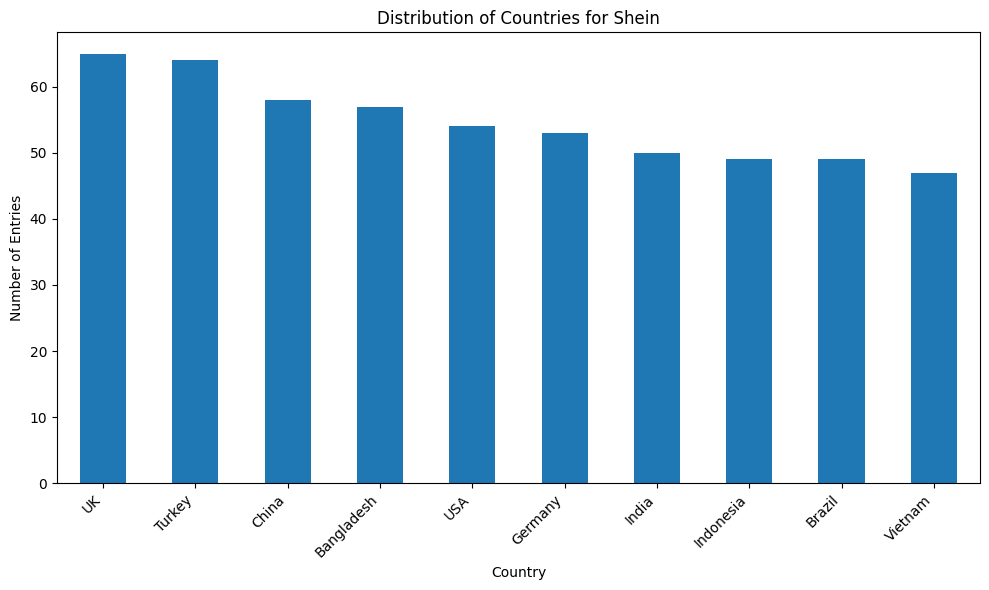

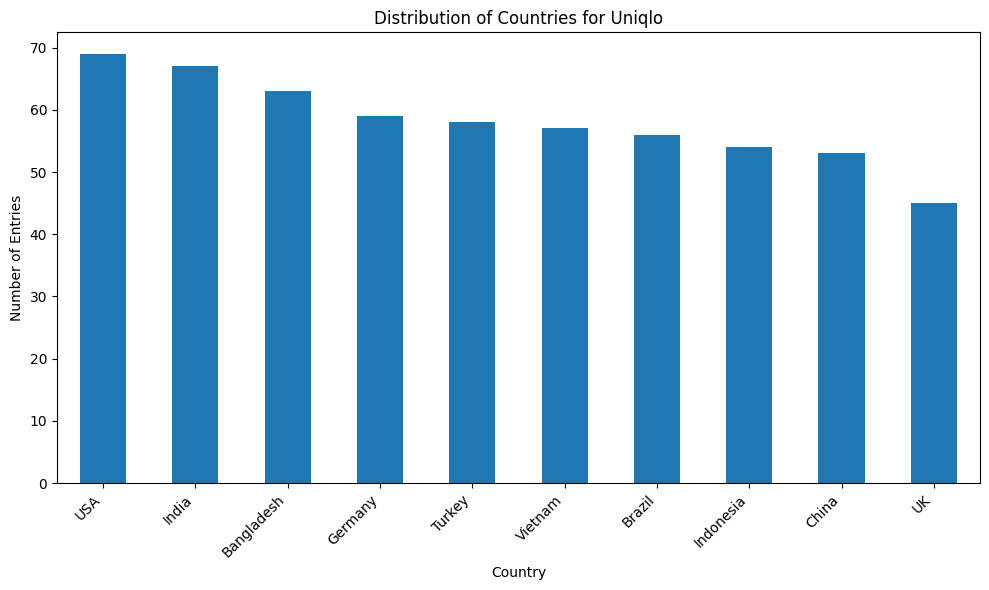

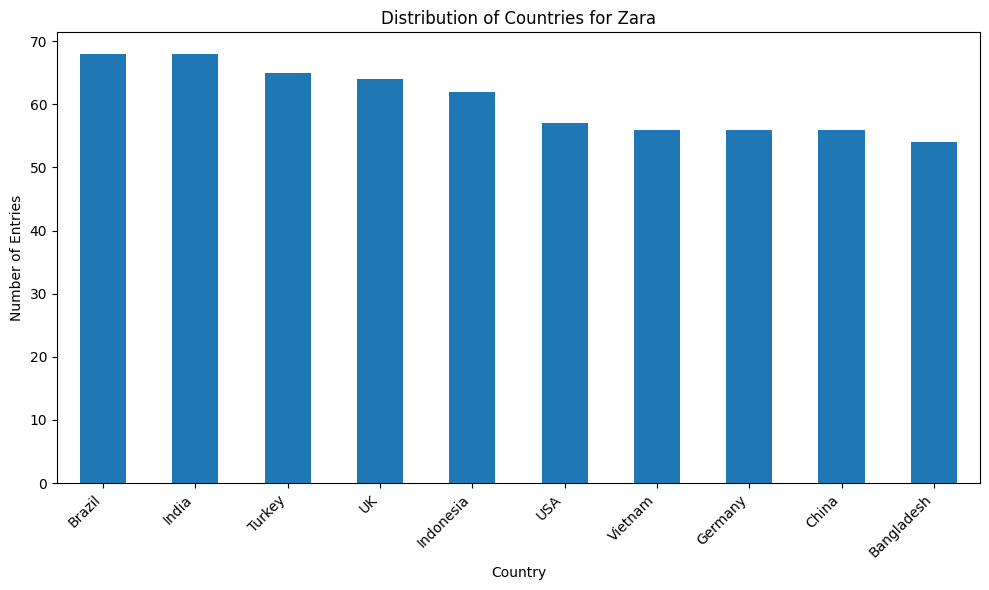

In [ ]:
brands = tc['Brand'].unique()


for brand in brands:
    plt.figure(figsize=(10, 6))
    
    brand_data = tc[tc['Brand'] == brand]['Country'].value_counts()
    brand_data.plot(kind='bar')

    plt.title(f'Distribution of Countries for {brand}')
    plt.xlabel('Country')
    plt.ylabel('Number of Entries')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

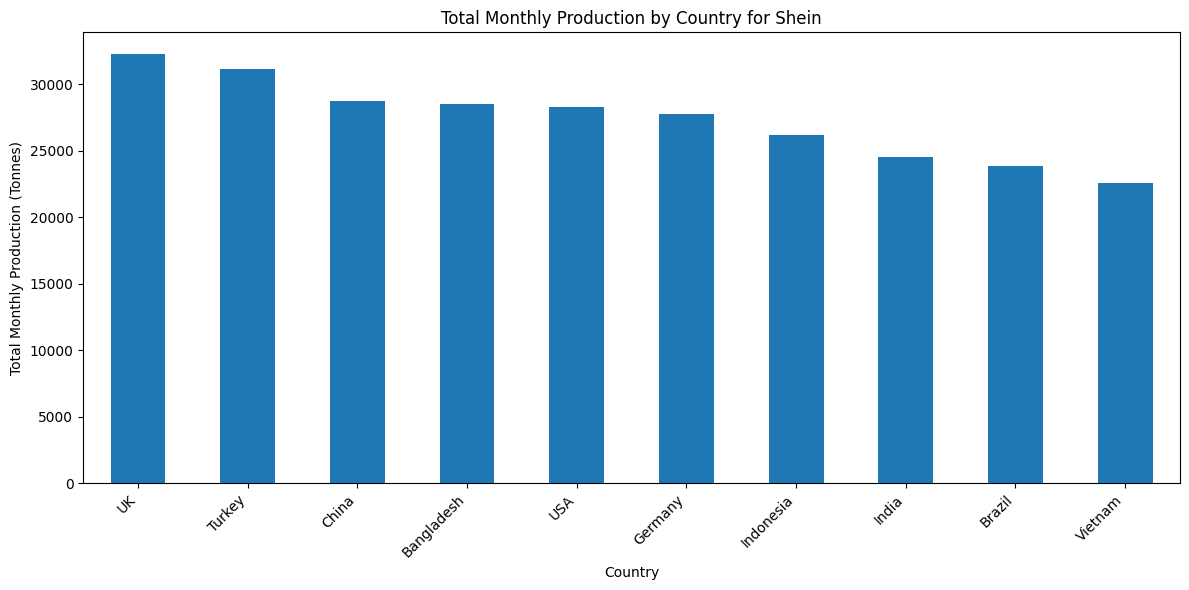

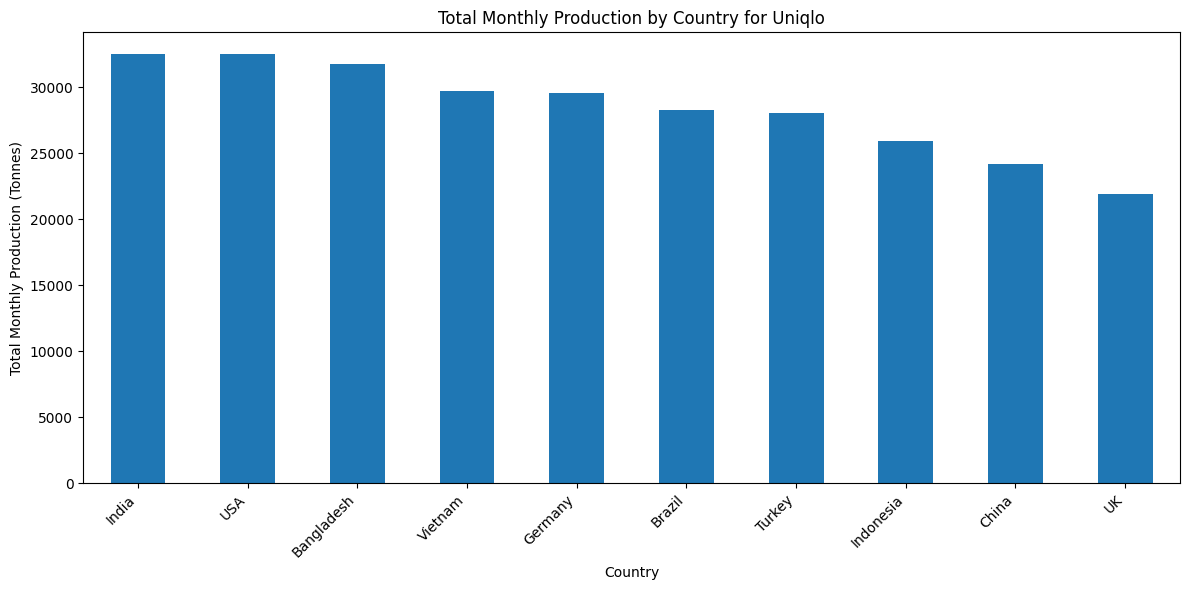

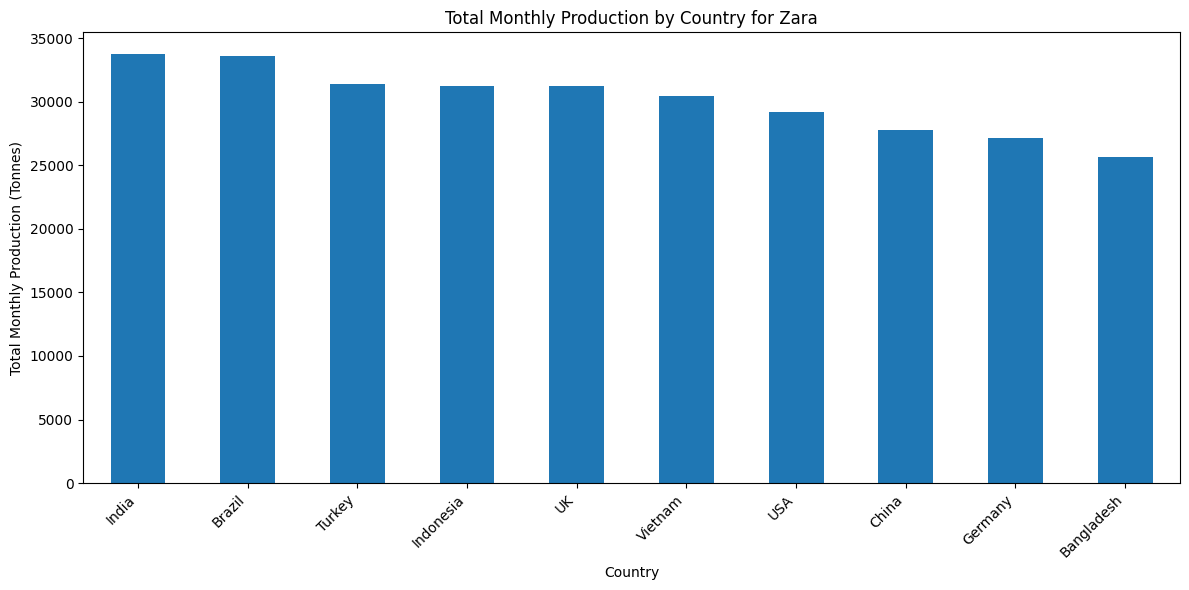

In [76]:
for brand in brands:
    plt.figure(figsize=(12, 6))
  
    brand_production_by_country = tc[tc['Brand'] == brand].groupby('Country')['Monthly_Production_Tonnes'].sum().sort_values(ascending=False)

    if not brand_production_by_country.empty:
        brand_production_by_country.plot(kind='bar')

        plt.title(f'Total Monthly Production by Country for {brand}')
        plt.xlabel('Country')
        plt.ylabel('Total Monthly Production (Tonnes)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data found for brand: {brand}")

Tabla por Marcas y paises con los datos de consumo

In [75]:
brand_tc_item = tc.groupby(['Brand','Year'])['Avg_Item_Price_USD'].mean().round(2)
brand_tc_cycles= tc.groupby(['Brand','Year'])['Release_Cycles_Per_Year'].mean().round()
brand_tc_return = tc.groupby(['Brand','Year'])['Return_Rate_Percent'].mean().round(2)
brand_tc_spent = tc.groupby(['Brand','Year'])['Avg_Spend_Per_Customer_USD'].mean().round(2)
brand_tc_shopping = tc.groupby(['Brand','Year'])['Shopping_Frequency_Per_Year'].mean().round()
brand_tc_PIB = tc.groupby(['Brand','Year'])['GDP_Contribution_Million_USD'].sum()

brand_tc_sales = pd.concat([brand_tc_item,brand_tc_cycles,brand_tc_return,brand_tc_spent,brand_tc_shopping,brand_tc_PIB], axis=1)
brand_tc_sales
brand_tc_habits = brand_tc_sales.drop(['GDP_Contribution_Million_USD'],axis=1)

brand_tc_sales


Avg_Item_Price_USD  Release_Cycles_Per_Year  Return_Rate_Percent  \
Brand  Year                                                                     
Shein  2015               21.14                     18.0                25.27   
       2016               19.50                     18.0                24.94   
       2017               20.73                     17.0                25.34   
       2018               20.66                     18.0                25.33   
       2019               20.31                     18.0                25.06   
       2020               20.19                     19.0                25.57   
       2021               20.30                     15.0                25.32   
       2022               19.63                     20.0                26.83   
       2023               18.71                     18.0                25.49   
       2024               19.66                     19.0                25.61   
Uniqlo 2015               18.79                     18.0                24.92   
       2016               20.10                     18.0                25.05   
       2017               21.28                     18.0                22.81   
       2018               19.32                     18.0                27.13   
       2019               20.26                     17.0                24.34   
       2020               19.88                     17.0                23.88   
       2021               20.00                     17.0                26.91   
       2022               19.82                     17.0                26.12   
       2023               20.67                     19.0                23.23   
       2024               19.91                     18.0                23.58   
Zara   2015               20.37                     18.0                26.27   
       2016               19.10                     18.0                24.72   
       2017               20.70                     18.0                25.82   
       2018               19.77                     18.0                24.50   
       2019               20.25                     18.0                25.07   
       2020               19.08                     18.0                25.45   
       2021               20.13                     17.0                24.43   
       2022               19.08                     18.0                25.52   
       2023               20.64                     17.0                24.68   
       2024               20.72                     18.0                24.39   

             Avg_Spend_Per_Customer_USD  Shopping_Frequency_Per_Year  \
Brand  Year                                                            
Shein  2015                      120.38                         11.0   
       2016                      120.33                         11.0   
       2017                      116.15                         10.0   
       2018                      115.39                         11.0   
       2019                      124.69                         11.0   
       2020                      115.73                         11.0   
       2021                      124.59                         11.0   
       2022                      120.87                         11.0   
       2023                      119.94                         11.0   
       2024                      113.59                         11.0   
Uniqlo 2015                      121.35                         11.0   
       2016                      117.93                         10.0   
       2017                      117.56                         12.0   
       2018                      118.28                         10.0   
       2019                      118.41                         11.0   
       2020                      126.61                         10.0   
       2021                      120.30                         11.0   
       2022                      122.52             

<Axes: xlabel='Year', ylabel='GDP_Contribution_Million_USD'>

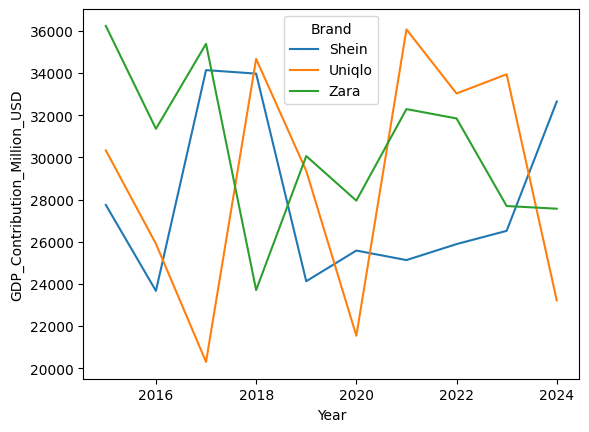

In [85]:
sns.lineplot(data=brand_tc_sales, x="Year", y="GDP_Contribution_Million_USD", hue="Brand")

<Axes: xlabel='Year', ylabel='Shopping_Frequency_Per_Year'>

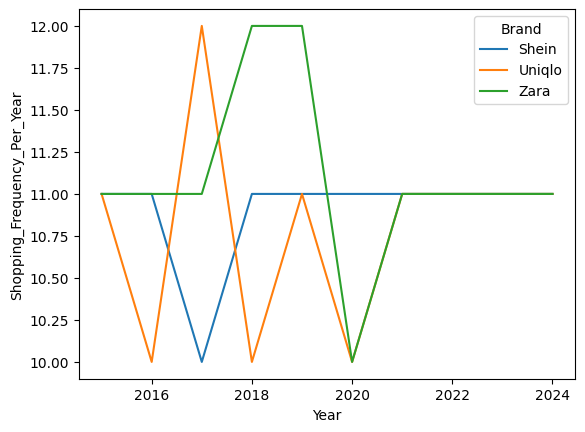

In [82]:
sns.lineplot(data=brand_tc_habits, x="Year", y="Shopping_Frequency_Per_Year", hue="Brand")

<Axes: xlabel='Year', ylabel='Avg_Spend_Per_Customer_USD'>

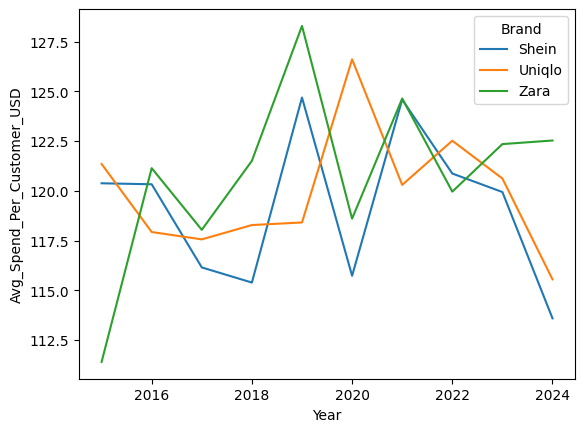

In [81]:
sns.lineplot(data=brand_tc_habits, x="Year", y="Avg_Spend_Per_Customer_USD", hue="Brand")

<Axes: xlabel='Year', ylabel='Return_Rate_Percent'>

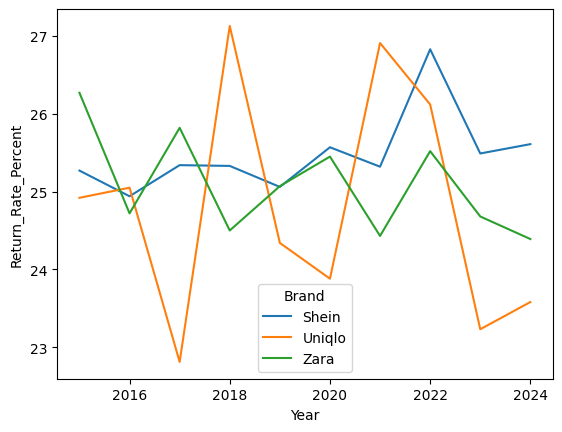

In [80]:
sns.lineplot(data=brand_tc_habits, x="Year", y="Return_Rate_Percent", hue="Brand")

<Axes: xlabel='Year', ylabel='Avg_Item_Price_USD'>

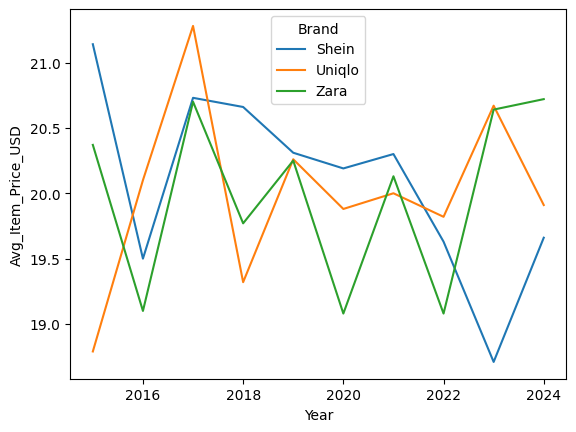

In [77]:
sns.lineplot(data=brand_tc_habits, x="Year", y="Avg_Item_Price_USD", hue="Brand")

<Axes: xlabel='Year', ylabel='Release_Cycles_Per_Year'>

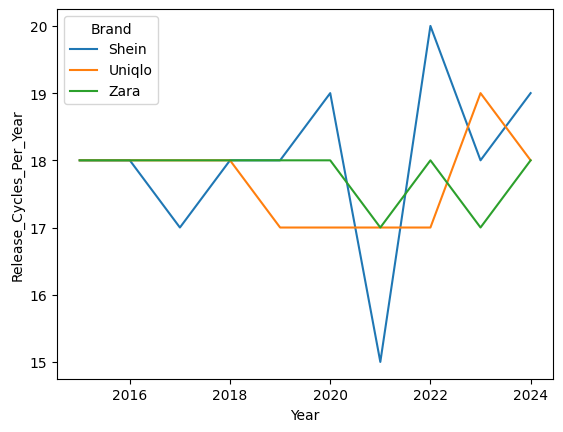

In [78]:
sns.lineplot(data=brand_tc_habits, x="Year", y="Release_Cycles_Per_Year", hue="Brand")